## Gather

In [16]:
import pandas as pd
import numpy as np

In [17]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding='UTF-8')

In [18]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Column 'timestamp' is a string object rather than a datetime object.

In [19]:
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
# Downloading the image predictions file data using the Requests library
import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [21]:
r.status_code

200

In [22]:
r.status_code == requests.codes.ok

True

In [23]:
r.text

"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/m

In [24]:
# Write to 'image_predictions.tsv' file using the requests library
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [25]:
df_image_predications = pd.read_csv('image_predictions.tsv', sep='\t')
df_image_predications.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Columns 'p1', 'p2', 'p3': some dog names start with lower case characters and others contains the character '_'.

In [26]:
df_image_predications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
import config
import tweepy

from twython import Twython, TwythonError

auth = tweepy.OAuthHandler(config.api_key, config.api_secret)
auth.set_access_token(config.access_token, config.token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

print(api.me().name)
print(api.me().location)

Arvind Sharma
Hyderabad, India


In [28]:
dog_rate_tweets = api.user_timeline('dog_rates')
# for tweet in dog_rate_tweets:
#     print(tweet.created_at, tweet.text)

# Total number of tweets from WeRateDogs (@dog_rates)
total_tweets = api.get_user('dog_rates').statuses_count
print(total_tweets)

# Latest tweet from WeRateDogs (@dog_rates)
print(dog_rate_tweets[0].text)

9948
@luuzx_ @Dumbo omg do you mind dming us some more pics?


In [29]:
import datetime

endDate = datetime.datetime(2017, 8, 1, 0, 0, 0)

tweets_archive_2 = []
tweets_from_api = api.user_timeline(id='WeRateDogs', count=total_tweets)

# for tweet in tweets_from_api:
#     if tweet.created_at < endDate:
#         tweets_archive_2.append(tweet)

In [30]:
import json
from timeit import default_timer as timer

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
with open("tweet_json.txt", "w") as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df_twitter_archive.tweet_id.values:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648


Rate limit reached. Sleeping for: 177


Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
1327: 706153300320784384
Success
1328: 705975130514706432
Success
1329: 705970349788291072
Success
1330: 705898680587526145
Success
1331: 705786532653883392
Success
1332: 705591895322394625
Success
1333: 705475953783398401
Success
1334: 705442520700944385
Success
1335: 705428427625635840
Success
1336: 705239209544720384
Success
1337: 705223444686888960
Success
1338: 705102439679201280
Success
1339: 705066031337840642
Success
13

Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
1580: 687312378585812992
Success
1581: 687127927494963200
Success
1582: 687124485711986689
Success
1583: 687109925361856513
Success
1584: 687102708889812993
Success
1585: 687096057537363968
Success
1586: 686947101016735744
Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
15

Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
18

Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
20

Rate limit reached. Sleeping for: 160


Success
2210: 668623201287675904
Success
2211: 668620235289837568
Success
2212: 668614819948453888
Success
2213: 668587383441514497
Success
2214: 668567822092664832
Success
2215: 668544745690562560
Success
2216: 668542336805281792
Success
2217: 668537837512433665
Success
2218: 668528771708952576
Success
2219: 668507509523615744
Success
2220: 668496999348633600
Success
2221: 668484198282485761
Success
2222: 668480044826800133
Success
2223: 668466899341221888
Success
2224: 668297328638447616
Success
2225: 668291999406125056
Success
2226: 668286279830867968
Success
2227: 668274247790391296
Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
2231: 668237644992782336
Success
2232: 668226093875376128
Success
2233: 668221241640230912
Success
2234: 668204964695683073
Success
2235: 668190681446379520
Success
2236: 668171859951755264
Success
2237: 668154635664932864
Success
2238: 668142349051129856
Success
2239: 668113020489474048
Success
22

In [31]:
# read JSON data from text file into pandas dataframe
df_api = pd.read_json('tweet_json.txt', lines = True)

# subset of dataframe with columns of interest
df_api = df_api[['id', 'retweet_count', 'favorite_count']]

# rename column 'id' obtained from JSON data to 'tweet_id'
df_api.rename(columns={'id':'tweet_id'}, inplace=True)

df_api.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8222,37735
1,892177421306343426,6079,32416
2,891815181378084864,4023,24412
3,891689557279858688,8369,41063
4,891327558926688256,9082,39255
5,891087950875897856,3008,19740
6,890971913173991426,1991,11542
7,890729181411237888,18276,63661
8,890609185150312448,4137,27117
9,890240255349198849,7144,31113


In [32]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Assess

In [33]:
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Column 'text' values not displayed completely.

In [34]:
# Display complete values for all entries for all columns
pd.set_option('display.max_colwidth', -1)

In [35]:
# Check whether 'text' column values displayed completely
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [36]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [37]:
# Check for duplicate tweet_id
sum(df_twitter_archive.tweet_id.duplicated())

0

No duplicate tweet_id's found

In [38]:
# Check for unique values of in_reply_to_status_id
df_twitter_archive.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

In [39]:
# Count of unique, not null (or non-NaN) values of in_reply_to_status_id
len(df_twitter_archive[df_twitter_archive.in_reply_to_status_id.notnull()]['in_reply_to_status_id'].unique())

77

We can see that there are values for column 'in_reply_to_status_id' in df_twitter_archive which are other than 'nan'. These are all replies and not original tweets.

In [40]:
# Check for unique values of in_reply_to_user_id
df_twitter_archive.in_reply_to_user_id.unique()

array([           nan, 2.28118160e+09, 4.73844300e+07, 3.10544075e+09,
       1.64877600e+07, 7.75962000e+07, 4.19698384e+09, 1.80670967e+08,
       2.79280991e+08, 1.94351775e+08, 1.36157220e+07, 2.19550580e+07,
       8.40547864e+17, 2.89413118e+09, 2.62595760e+07, 3.05820820e+07,
       2.06837240e+07, 1.58285381e+09, 1.13211856e+08, 1.18563420e+07,
       2.91859009e+08, 2.91663050e+07, 7.30505014e+17, 1.58464070e+07,
       4.71729748e+09, 3.58972768e+08, 2.31910820e+09, 2.87854860e+07,
       1.19898851e+09, 4.67036706e+08, 1.63746780e+07, 2.14356580e+07])

In [41]:
# Count of unique values of in_reply_to_user_id
len(df_twitter_archive[df_twitter_archive.in_reply_to_user_id.notnull()]['in_reply_to_user_id'].unique())

31

We can see that there are values for column 'in_reply_to_user_id' in df_twitter_archive which are other than 'nan'. These are again replies and not original tweets.

In [42]:
# Check for unique values of retweeted_status_id
df_twitter_archive.retweeted_status_id.unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [43]:
# Count of unique values of retweeted_status_id
len(df_twitter_archive[df_twitter_archive.retweeted_status_id.notnull()]['retweeted_status_id'].unique())

181

We can see that there are values for column 'retweeted_status_id' in df_twitter_archive which are other than 'nan'. These are retweets and not original tweets.

In [44]:
# Check for unique values of retweeted_status_timestamp
df_twitter_archive.retweeted_status_timestamp.unique()

array([nan, '2017-07-19 00:47:34 +0000', '2017-07-15 02:44:07 +0000',
       '2017-02-12 01:04:29 +0000', '2017-06-23 01:10:23 +0000',
       '2017-06-23 16:00:04 +0000', '2015-11-24 03:51:38 +0000',
       '2017-06-19 17:14:49 +0000', '2017-05-21 16:48:45 +0000',
       '2017-05-28 17:23:24 +0000', '2017-06-09 16:22:42 +0000',
       '2017-06-08 03:32:35 +0000', '2017-03-13 00:02:39 +0000',
       '2017-05-02 00:04:57 +0000', '2017-05-27 19:39:34 +0000',
       '2017-05-18 01:17:25 +0000', '2017-05-22 00:28:40 +0000',
       '2017-03-04 00:21:08 +0000', '2017-05-12 16:05:02 +0000',
       '2016-12-07 22:38:52 +0000', '2017-05-05 18:36:06 +0000',
       '2017-05-06 17:49:42 +0000', '2016-08-05 21:19:27 +0000',
       '2017-03-08 18:52:12 +0000', '2017-04-26 02:37:47 +0000',
       '2017-03-23 00:18:10 +0000', '2017-04-24 02:13:14 +0000',
       '2017-03-16 00:00:07 +0000', '2017-04-20 18:14:33 +0000',
       '2017-02-14 23:43:18 +0000', '2017-02-08 17:00:26 +0000',
       '2017-04-01 2

In [45]:
# Count of unique values of retweeted_status_timestamp
len(df_twitter_archive[df_twitter_archive.retweeted_status_timestamp.notnull()]['retweeted_status_timestamp'].unique())

181

We can see that there are values for column 'retweeted_status_timestamp' in df_twitter_archive which are other than 'nan'. These are the same number as for 'retweeted_status_id' which verifies that entries in 'df_twitter_archive' are retweets.

In [46]:
# Check for unique values of retweeted_status_user_id
df_twitter_archive.retweeted_status_user_id.unique()

array([           nan, 4.19698384e+09, 1.96074000e+07, 5.12804507e+08,
       1.54767397e+08, 7.87461778e+17, 3.63890752e+08, 5.87097230e+07,
       6.66990130e+07, 7.47554344e+17, 3.41021133e+08, 5.97064155e+08,
       4.11984180e+07, 8.11740824e+08, 7.26634734e+08, 7.12457247e+17,
       4.46675020e+07, 4.87197737e+08, 2.48855660e+07, 7.99237010e+07,
       1.22832566e+09, 1.73272909e+09, 1.95036846e+08, 2.80479778e+08,
       7.83214000e+05, 4.29683174e+09])

In [47]:
# Count of unique values of retweeted_status_user_id
len(df_twitter_archive[df_twitter_archive.retweeted_status_user_id.notnull()]['retweeted_status_user_id'].unique())

25

We can see that 25 of the total unique values for column 'retweeted_status_user_id' in df_twitter_archive have values other than 'nan'. These are again retweets and not original tweets.

In [48]:
# Check different name values in df_twitter_archive
df_twitter_archive.name.value_counts()

None        745
a           55 
Charlie     12 
Oliver      11 
Lucy        11 
Cooper      11 
Tucker      10 
Lola        10 
Penny       10 
Winston     9  
Bo          9  
the         8  
Sadie       8  
Bailey      7  
Buddy       7  
Toby        7  
Daisy       7  
an          7  
Leo         6  
Jax         6  
Scout       6  
Stanley     6  
Milo        6  
Koda        6  
Bella       6  
Dave        6  
Oscar       6  
Rusty       6  
Jack        6  
Sunny       5  
           ..  
Bluebert    1  
Shelby      1  
Pawnd       1  
Sweets      1  
Georgie     1  
Harlso      1  
Lulu        1  
Shadoe      1  
Birf        1  
Napolean    1  
Buddah      1  
Sephie      1  
Monty       1  
Anthony     1  
Ronduh      1  
Grady       1  
Mollie      1  
Brady       1  
Sobe        1  
Mona        1  
Hector      1  
Mauve       1  
DonDon      1  
Gerbald     1  
Dixie       1  
Dotsy       1  
Chevy       1  
Kirk        1  
Mack        1  
Harvey      1  
Name: name, Length: 957,

In [49]:
# Check all the unique name values which are lower case in df_twitter_archive - these are not actual names
df_twitter_archive[df_twitter_archive.name.str.islower()]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [50]:
# Count of all name values which are lower case in df_twitter_archive - these are not actual names
df_twitter_archive[df_twitter_archive.name.str.islower()].shape[0]

109

In [51]:
# Count of all name values having single character in df_twitter_archive - these are not actual names
df_twitter_archive[df_twitter_archive.name.str.len() < 2]['name'].value_counts()

a    55
O    1 
Name: name, dtype: int64

There are values for the 'name' column in df_twitter_archive which start with lower case characters. These are not valid name values. Also, we find that there the values 'a'  and 'O' have been assigned as a value to the 'name' column 55 times and 1 time respectively. Again, these are not valid name values.

In [52]:
df_twitter_archive[df_twitter_archive.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


Dog name incorrectly represented as 'O' instead of O'Malley.

In [53]:
# Check unique values for 'rating_denominator'
df_twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [54]:
# Check unique values for 'rating_numerator'
df_twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [55]:
# Check unique values for 'rating_denominator'
df_twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

We can see that there are certain outliers for denominator and numerator values such as the value 0. It would be wise to correctly extract the numerator and denominator values from the text and repopulate these values in the respective columns.

In [56]:
# Check for incorrect names
df_twitter_archive[df_twitter_archive.name.str.islower()]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

We can see that there are incorrect name values for entries in 'df_twitter_archive'.

In [57]:
df_image_predications.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


We can see that columns in 'p1', 'p2', 'p3' in 'df_image_predictions': Dog breeds start with lower case characters and others contains the underscore character.

In [58]:
df_image_predications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [59]:
df_api.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8222,37735
1,892177421306343426,6079,32416
2,891815181378084864,4023,24412
3,891689557279858688,8369,41063
4,891327558926688256,9082,39255
5,891087950875897856,3008,19740
6,890971913173991426,1991,11542
7,890729181411237888,18276,63661
8,890609185150312448,4137,27117
9,890240255349198849,7144,31113


In [60]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Quality
1. Dataframes 'df_twitter_archive', 'df_image_predications' and 'df_api' contain different number of entries which are 2356, 2075 and 2342 entries respectively.
2. Column 'timestamp' is a string object rather than datetime object.
3. Entries in 'df_twitter_archive' that are retweets which are not required for this analysis.
4. Entries in 'df_twitter_archive' are replies to status id's and some entries in 'df_twitter_archive' are replies to user id's which are not required for this analysis.
5. After deleting entries which are retweets or replies, columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' do not provide much value for the sake of this analysis.
6. Column 'name' values starting with lower case characters which are not actual dog names.
7. 1 entry in df_twitter_archive having the single character 'O' as the name value. Dog name incorrectly represented as 'O' instead of O'Malley.
8. Some values of column 'name' set as 'None' when the 'text' column contains valid dog name. 
9. Outliers in rating_numerator and rating_denominator values in df_twitter_archive. 
10. Columns 'p1', 'p2', 'p3' in 'df_image_predictions': Dog breeds start with lower case characters and others contains the underscore character.

### Tidiness
1. One variable i.e. dog stage represented in 4 columns namely 'doggo', 'floofer', 'pupper' and 'puppo' in 'twitter_archive_enhanced'. This variable should be a categorical variable.
2. 'df_image_predications' and 'df_api' tables are not different and unique observational units but should be merged with 'twitter_archive_enhanced'.

### Clean

In [61]:
# Create copies of original dataframes to work on
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predications_clean = df_image_predications.copy()
df_api_clean = df_api.copy()

### Define (Quality 1)
- Find the common set of tweets in the three dataframes 'df_twitter_archive', 'df_image_predications' and 'df_api' and dropping the rest

#### Code

In [62]:
len(df_twitter_archive_clean), len(df_image_predications_clean), len(df_api_clean)

(2356, 2075, 2339)

In [63]:
# 'df_image_predications' count (2075) is lower than that of 'df_twitter_archive' (2356) and 'df_api' (2342)
common_tweets = set(df_image_predications_clean.tweet_id)
df_api_clean = df_api_clean[df_api_clean.tweet_id.isin(common_tweets)]

common_tweets = set(df_api_clean.tweet_id)
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.tweet_id.isin(common_tweets)]
df_image_predications_clean = df_image_predications_clean[df_image_predications_clean.tweet_id.isin(common_tweets)]

In [64]:
len(df_twitter_archive_clean), len(df_image_predications_clean), len(df_api_clean)

(2066, 2066, 2066)

#### Define (Tidiness 1a)
- Add a new column 'dog_stage' populated with appropriate value from 'text' column and remove individual dog stage columns namely 'Doggo', 'Floofer', 'Pupper' and 'Puppo' in 'df_twitter_archive'.

#### Code

In [65]:
# Replace None in dog stages with space
df_twitter_archive_clean.doggo.replace('None', '', inplace = True)
df_twitter_archive_clean.floofer.replace('None', '', inplace = True)
df_twitter_archive_clean.pupper.replace('None', '', inplace = True)
df_twitter_archive_clean.puppo.replace('None', '', inplace = True)

In [66]:
# Combining all the dog stages into one column
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + \
df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo

df_twitter_archive_clean.dog_stage.value_counts()

                1745
pupper          211 
doggo           67  
puppo           23  
doggopupper     11  
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

In [67]:
# Renaming all dog_stages
df_twitter_archive_clean.dog_stage.replace('', 'None', inplace = True)
df_twitter_archive_clean.dog_stage.replace('pupper', 'Pupper', inplace = True)
df_twitter_archive_clean.dog_stage.replace('doggo', 'Doggo', inplace = True)
df_twitter_archive_clean.dog_stage.replace('puppo', 'Puppo', inplace = True)
df_twitter_archive_clean.dog_stage.replace('doggopupper', 'Multiple', inplace = True)
df_twitter_archive_clean.dog_stage.replace('floofer', 'Floofer', inplace = True)
df_twitter_archive_clean.dog_stage.replace('doggopuppo', 'Multiple', inplace = True)
df_twitter_archive_clean.dog_stage.replace('doggofloofer', 'Multiple', inplace = True)

In [68]:
# Deleting the individual dog stage columns
df_twitter_archive_clean = df_twitter_archive_clean.drop('doggo', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('floofer', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('pupper', axis = 1)
df_twitter_archive_clean = df_twitter_archive_clean.drop('puppo', axis = 1)

#### Test

In [69]:
# Verify all unique value of the feature 'dog_stage'
df_twitter_archive_clean['dog_stage'].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Multiple'],
      dtype=object)

#### Define (Tidiness 1b)
- Convert 'dog_stage' column to categorical type

#### Code

In [70]:
# Convert 'dog_stage' column to categorical type
df_twitter_archive_clean.dog_stage = df_twitter_archive_clean.dog_stage.astype('category')

#### Test

In [71]:
# Check whether 'dog_stage' column is changd to categorical type
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
dog_stage                     2066 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 228.2+ KB


#### Define (Tidiness 2)
- Merge 'df_image_predications' and 'df_api' with 'twitter_archive_enhanced'.

#### Code

In [72]:
df_master_clean = pd.merge(df_twitter_archive_clean, df_image_predications_clean, on='tweet_id', how='left')

In [73]:
df_master_clean = pd.merge(df_master_clean, df_api_clean, on='tweet_id', how='left')

#### Test

In [74]:
# Check that all the columns of the three dataframes have been merged appropriately
df_master_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8222,37735
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6079,32416
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4023,24412
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8369,41063
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9082,39255


In [75]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
dog_stage                     2066 non-null category
jpg_url                       2066 non-null object
img_num                       2066 non-null int64
p1                            2066 non-null object
p1_conf                       2066

#### Define (Quality 2)
- Convert column 'timestamp' from a string object to a datetime object.

#### Code

In [76]:
# Convert the column 'timestamp' from string to datetime object.
df_master_clean['timestamp'] = pd.to_datetime(df_master_clean['timestamp'])

#### Test

In [77]:
# Check whether the column 'timestamp' has been converted from string to datetime object.
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null datetime64[ns]
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
dog_stage                     2066 non-null category
jpg_url                       2066 non-null object
img_num                       2066 non-null int64
p1                            2066 non-null object
p1_conf                   

#### Define (Quality 3)
- Remove entries from 'df_twitter_archive' which are retweets

#### Code

In [78]:
# Dropping entries where column 'retweeted_status_id' have non null (or non-NaN) values
df_master_clean.drop(df_master_clean[df_master_clean.retweeted_status_id.notnull()].index, inplace=True)

#### Test

In [79]:
# Check whether any value for column 'retweeted_status_id' has any non null (or non-NaN) value
df_master_clean[df_master_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [80]:
# Check whether any value for column 'retweeted_status_user_id' has any non null (or non-NaN) value
df_master_clean[df_master_clean.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [81]:
df_master_clean.shape

(1991, 27)

#### Define (Quality 4)
- Remove entries from 'df_twitter_archive' which are replies to status_id's

#### Code

In [82]:
# Dropping 77 entries where column 'in_reply_to_status_id' have non null (or non-NaN) values
df_master_clean.drop(df_master_clean[df_master_clean.in_reply_to_status_id.notnull()].index, inplace=True)

#### Test

In [83]:
# Check whether any value for column 'in_reply_to_status_id' has any non null (or non-NaN) value
df_master_clean[df_master_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [84]:
# Check whether any value for column 'in_reply_to_user_id' has any non null (or non-NaN) value
df_master_clean[df_master_clean.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [85]:
df_master_clean.shape

(1968, 27)

#### Define (Quality 5)
- After deleting entries which are retweets or replies, columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' do not provide much value for the sake of this analysis. Dropping these columns.

#### Code

In [86]:
df_master_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [87]:
# Check whether the columns have been dropped successfully
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2065
Data columns (total 20 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null datetime64[ns]
text                  1968 non-null object
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
name                  1968 non-null object
dog_stage             1968 non-null category
jpg_url               1968 non-null object
img_num               1968 non-null int64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null bool
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null bool
p3                    1968 non-null object
p3_conf               1968 non-null float64
p3_dog                1968 non-null bool
retweet_count         1968 non-null int64
favorite_count        1968 non-null int64
dtypes: bool(3), category(1), da

#### Define (Quality 6)
- Correct the column 'name' values starting with lower case characters

#### Code

In [88]:
# All entries with column 'name' values starting with lower case characters
df_master_clean[df_master_clean.name.str.islower()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,such,None,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,2.632080e-02,False,11335,45105
50,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14,10,a,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,1.148540e-01,False,15500,48192
138,859196978902773760,2017-05-02 00:04:57,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12,10,quite,None,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,1.283830e-01,False,30473,89884
152,855459453768019968,2017-04-21 16:33:22,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",12,10,quite,None,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,8.262820e-02,True,8394,30192
288,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14,10,one,None,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,5.619990e-02,True,1444,9951
433,806219024703037440,2016-12-06 19:29:28,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,11,10,incredibly,None,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,2.127450e-02,True,1293,6821
518,792913359805018113,2016-10-31 02:17:31,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,13,10,a,None,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,3.900860e-02,False,4368,15232
641,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,10,10,a,None,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,3,Newfoundland,0.574345,True,Border_collie,0.128352,True,Saint_Bernard,5.947550e-02,True,1816,6840
657,770655142660169732,2016-08-30 16:11:18,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,11,10,very,None,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,9.157150e-02,False,1873,7721
685,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,13,10,my,None,https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg,1,Pembroke,0.509491,True,Cardigan,0.330401,True,Shetland_sheepdog,3.887490e-02,True,3645,27825


In [89]:
# Number of entries with column 'name' values starting with lower case characters
df_master_clean[df_master_clean.name.str.islower()].shape[0]

98

In [90]:
# Update 'name' values for entries where 'text' column contains strings 'named' or 'name is'
import re

count = 0
for _ in df_master_clean[df_master_clean.name.str.islower()]['text']:
    if 'named' in _:
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"named\s(\w+)", _)
    elif 'name is' in _:
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"name is\s(\w+)", _)
    else:
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = "None"
       

#### Test

In [91]:
# Check whether any value for 'name' column starts with lower case character
df_master_clean[df_master_clean.name.str.islower()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


#### Define (Quality 7)
- Correct dog name which is incorrectly represented as 'O' instead of O'Malley.

#### Code

In [92]:
# Correct dog name which is incorrectly represented as 'O' instead of O'Malley.
mask = df_master_clean.name == 'O'
df_master_clean.loc[mask, 'name'] = "O'Malley"
df_master_clean[df_master_clean.name == "O'Malley"]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
618,776201521193218049,2016-09-14 23:30:38,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,10,10,O'Malley,None,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,2715,10144


#### Test

In [93]:
# Check whether dog name is correctly updated as O'Malley.
df_master_clean[df_master_clean.name == "O'Malley"]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
618,776201521193218049,2016-09-14 23:30:38,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,10,10,O'Malley,None,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,2715,10144


#### Define (Quality 8)
- Replace appropriate values of column 'name' set as 'None' when the 'text' column contains valid dog name.

#### Code

In [94]:
# Number of entries with 'None' as value for 'name' column
df_master_clean[df_master_clean.name == 'None'].shape[0]

600

In [95]:
for _ in df_master_clean[df_master_clean.name == 'None']['text']:
    if 'Meet ' in _ and re.match(r'[A-Z].*', _.split()[1]):
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"Meet\s(\w+)", _)
    elif 'Say hello to ' in _ and re.match(r'[A-Z].*', _.split()[3]):
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"Say hello to\s(\w+)", _)
    elif 'Here we have ' in _ and re.match(r'[A-Z].*', _.split()[3]):
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"Here we have\s(\w+)", _)
    elif 'named ' in _ and re.match(r'[A-Z].*', _.split()[_.split().index('named') + 1]):
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"named\s(\w+)", _)

In [96]:
# Number of entries with 'None' as value for 'name' column should be reduced from the earlier number of 685
df_master_clean[df_master_clean.name == 'None'].shape[0]

595

In [97]:
for _ in df_master_clean[df_master_clean.name == 'None']['text']:
    if 'name is ' in _:
        mask = df_master_clean.text == _
        df_master_clean.loc[mask, 'name'] = re.findall(r"name is\s(\w+)", _)

#### Test

In [98]:
# Number of entries with 'None' as value for 'name' column should be reduced from the earlier number of 685
df_master_clean[df_master_clean.name == 'None'].shape[0]

591

In [99]:
# Change values in 'name' column from 'None' to NaN
df_master_clean['name'] = df_master_clean['name'].replace('None', np.NaN)
df_master_clean[df_master_clean.name == 'None'].shape[0]

0

#### Define (Quality 9)
- Checking outliers in rating_numerator and rating_denominator: Correct the incorrect values for 'rating_numerator' and 'rating_denominator' columns

#### Code

In [100]:
# Extract rating values and add to a new column 'rating'
df_master_clean['rating'] = df_master_clean.text.str.extract(('(\d+\.?\d*\/\d+)'), expand=False)

In [101]:
df_master_clean[df_master_clean.rating.isnull()].shape

(0, 21)

In [102]:
df_master_clean.rating.value_counts()

12/10       445
10/10       416
11/10       392
13/10       252
9/10        149
8/10        95 
7/10        51 
14/10       33 
5/10        32 
6/10        32 
3/10        19 
4/10        15 
2/10        9  
1/10        4  
60/50       1  
44/40       1  
50/50       1  
11.26/10    1  
99/90       1  
165/150     1  
11.27/10    1  
144/120     1  
88/80       1  
13.5/10     1  
9.75/10     1  
7/11        1  
24/7        1  
420/10      1  
45/50       1  
9/11        1  
84/70       1  
121/110     1  
0/10        1  
1/2         1  
1776/10     1  
204/170     1  
80/80       1  
4/20        1  
Name: rating, dtype: int64

In [103]:
df_master_clean[df_master_clean.rating == '420/10']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
1788,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,NaN,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,...,False,accordion,0.094075,False,drumstick,0.061113,False,8879,24757,420/10


This is a meme rating for the rap artist Snoop Dogg. Hence deleting this entry.

In [104]:
df_master_clean.shape

(1968, 21)

In [105]:
# Delete the entry for meme rating for the rap artist Snoop Dogg
df_master_clean.drop(df_master_clean[df_master_clean.tweet_id == 670842764863651840].index, inplace=True)

In [106]:
# Check that deletetion was successful
df_master_clean.shape

(1967, 21)

In [107]:
df_master_clean[df_master_clean.rating == '24/7']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
410,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam,None,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1557,5649,24/7


This text doesn't contain dog rating but 24/7 represents a timeline. Hence deleting this entry.

In [108]:
df_master_clean.shape

(1967, 21)

In [109]:
# Delete the entry
df_master_clean.drop(df_master_clean[df_master_clean.tweet_id == 810984652412424192].index, inplace=True)

In [110]:
df_master_clean.shape

(1966, 21)

In [111]:
df_master_clean[df_master_clean.rating == '50/50']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
995,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,221,2446,50/50


The correct rating is 11/10 and not 50/50.

In [112]:
df_master_clean.loc[df_master_clean.tweet_id == 716439118184652801, 'rating'] = '11/10'

In [113]:
# Check the rating is updated correctly
df_master_clean[df_master_clean.tweet_id == 716439118184652801]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
995,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,221,2446,11/10


In [114]:
# View entries with more than one fractional values in column 'text'
df_master_clean[df_master_clean.text.str.contains(('\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*\/\d+\.?\d*)'))]

/Users/avin001/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
610,777684233540206592,2016-09-19 01:42:24,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10,NaN,None,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,...,True,golden_retriever,0.162850,True,otterhound,0.110921,True,3177,11865,12/10
819,747600769478692864,2016-06-28 01:21:27,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10,Bookstore,None,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,...,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,583,2422,10/10
870,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,14058,36157,9/11
961,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,...,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1648,4243,4/20
995,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,221,2446,11/10
1011,714258258790387713,2016-03-28 01:10:13,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10,Travis,None,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,...,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,753,3132,10/10
1133,703356393781329922,2016-02-26 23:10:06,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10,Socks,None,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,...,True,collie,0.097364,True,English_springer,0.003037,True,405,1988,9/10
1223,695064344191721472,2016-02-04 02:00:27,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10,NaN,None,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,1,seat_belt,...,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,635,1672,4/10
1228,694352839993344000,2016-02-02 02:53:12,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10,Oliviér,None,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,...,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,656,2130,10/10
1263,691483041324204033,2016-01-25 04:49:38,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10,NaN,None,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,bloodhound,...,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,594,2474,5/10


Its turns out that 
- some tweets have more than one dog so more than one rating 
- and in other cases the ratings are incorrect.
- some tweets have no ratings.

We are not changing the value of 'rating' column in case the 'text' column contains two dog ratings and thus consider any rating to be a valid one.

In [115]:
no_ratings_text1 = "This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf"
no_ratings_text2 = "Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD"
no_ratings_text3 = "This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba"
no_ratings_text4 = "Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y"
no_ratings_text5 = "This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"

Updating correct ratings for tweets with no ratings where text contains valid ratings

In [116]:
df_master_clean.loc[df_master_clean.text == no_ratings_text1, 'rating'] = '9/10'
df_master_clean.loc[df_master_clean.text == no_ratings_text2, 'rating'] = '8/10'
df_master_clean.loc[df_master_clean.text == no_ratings_text3, 'rating'] = '8/10'
df_master_clean.loc[df_master_clean.text == no_ratings_text4, 'rating'] = '7/10'
df_master_clean.loc[df_master_clean.text == no_ratings_text5, 'rating'] = '9/10'

Updating correct values for columns 'rating_numerator' and 'rating_denominator' and revaluting float values for column 'rating'.

In [117]:
# Extract correct vaues for columns 'rating_numerator' and 'rating_numerator' from the column 'rating'
df_master_clean['rating_numerator'] = df_master_clean['rating'].apply(lambda x: x.split('/')[0])
df_master_clean['rating_denominator'] = df_master_clean['rating'].apply(lambda x: x.split('/')[1])

In [118]:
# Changing values for columns 'rating_numerator' and 'rating_denominator' to float
df_master_clean['rating_numerator'] = df_master_clean.rating_numerator.astype(float)
df_master_clean['rating_denominator'] = df_master_clean.rating_denominator.astype(float)

In [119]:
# Update float values for column 'rating' from the float values for columns 'rating_numerator' and 'rating_denominator'
df_master_clean['rating'] = df_master_clean['rating_numerator'] / df_master_clean['rating_denominator']

#### Test

In [120]:
# Check for any null values for column 'rating_numerator'
df_master_clean.rating_numerator.isnull().values.any()

False

In [121]:
# Check for any null values for column 'rating_denominator'
df_master_clean.rating_denominator.isnull().values.any()

False

In [122]:
# Check for any null values for column 'rating'
df_master_clean.rating.isnull().values.any()

False

In [123]:
# Check for value counts for different values for 'rating_numerator' column
df_master_clean.rating_numerator.value_counts()

12.00      445
10.00      416
11.00      393
13.00      252
9.00       150
8.00       96 
7.00       52 
14.00      33 
6.00       32 
5.00       31 
3.00       19 
4.00       16 
2.00       9  
1.00       5  
45.00      1  
84.00      1  
1776.00    1  
11.27      1  
13.50      1  
165.00     1  
11.26      1  
0.00       1  
9.75       1  
80.00      1  
88.00      1  
144.00     1  
44.00      1  
60.00      1  
99.00      1  
204.00     1  
121.00     1  
Name: rating_numerator, dtype: int64

In [124]:
# Check for value counts for different values for 'rating_denominator' column
df_master_clean.rating_denominator.value_counts()

10.0     1951
50.0     2   
80.0     2   
11.0     2   
170.0    1   
150.0    1   
2.0      1   
120.0    1   
110.0    1   
40.0     1   
90.0     1   
20.0     1   
70.0     1   
Name: rating_denominator, dtype: int64

In [125]:
# Check for value counts for different values for 'rating' column
df_master_clean.rating.value_counts()

1.200000      449
1.000000      417
1.100000      398
1.300000      252
0.900000      150
0.800000      96 
0.700000      51 
1.400000      33 
0.500000      32 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      4  
1.127000      1  
1.350000      1  
0.636364      1  
0.818182      1  
1.126000      1  
0.975000      1  
177.600000    1  
0.000000      1  
Name: rating, dtype: int64

In [126]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2065
Data columns (total 21 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null datetime64[ns]
text                  1966 non-null object
rating_numerator      1966 non-null float64
rating_denominator    1966 non-null float64
name                  1376 non-null object
dog_stage             1966 non-null category
jpg_url               1966 non-null object
img_num               1966 non-null int64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                1966 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                1966 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                1966 non-null bool
retweet_count         1966 non-null int64
favorite_count        1966 non-null int64
rating                1966 n

#### Define (Quality 10)
- Columns 'p1', 'p2', 'p3': Words in dog names should start with capital case characters and remove the character '_' between names

#### Code

In [127]:
# Replace underscore character '_' with a space character ' '
df_master_clean['p1'] = df_master_clean['p1'].str.replace('_', ' ')
df_master_clean['p2'] = df_master_clean['p2'].str.replace('_', ' ')
df_master_clean['p3'] = df_master_clean['p3'].str.replace('_', ' ')

In [128]:
# Make words in columns 'p1', 'p2', 'p3' start with capital case characters
df_master_clean['p1'] = df_master_clean['p1'].str.title()
df_master_clean['p2'] = df_master_clean['p2'].str.title()
df_master_clean['p3'] = df_master_clean['p3'].str.title()

#### Test

In [129]:
# Check whether words in columns 'p1', 'p2', 'p3' start with capital case characters and there is no '_' in names
df_master_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


In [130]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 2065
Data columns (total 21 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null datetime64[ns]
text                  1966 non-null object
rating_numerator      1966 non-null float64
rating_denominator    1966 non-null float64
name                  1376 non-null object
dog_stage             1966 non-null category
jpg_url               1966 non-null object
img_num               1966 non-null int64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                1966 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                1966 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                1966 non-null bool
retweet_count         1966 non-null int64
favorite_count        1966 non-null int64
rating                1966 n

### Storing, analyzing and visualizing data

In [131]:
# Store the clean DataFrame in a CSV file
df_master_clean.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [133]:
# read the data
df_master = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [134]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 21 columns):
tweet_id              1966 non-null int64
timestamp             1966 non-null object
text                  1966 non-null object
rating_numerator      1966 non-null float64
rating_denominator    1966 non-null float64
name                  1376 non-null object
dog_stage             1966 non-null object
jpg_url               1966 non-null object
img_num               1966 non-null int64
p1                    1966 non-null object
p1_conf               1966 non-null float64
p1_dog                1966 non-null bool
p2                    1966 non-null object
p2_conf               1966 non-null float64
p2_dog                1966 non-null bool
p3                    1966 non-null object
p3_conf               1966 non-null float64
p3_dog                1966 non-null bool
retweet_count         1966 non-null int64
favorite_count        1966 non-null int64
rating                1966 non-null fl

In [135]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,rating
count,1.966000e+03,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03,1.966000e+03,1966.000000,1966.000000,1966.000000
mean,7.359869e+17,11.948006,10.459817,1.201933,0.594271,1.347167e-01,6.024139e-02,2638.545270,8695.492879,1.143353
std,6.749385e+16,40.620863,6.803319,0.559367,0.271885,1.010200e-01,5.096875e-02,4706.959389,12752.775127,3.987626
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,77.000000,0.000000
25%,6.758593e+17,10.000000,10.000000,1.000000,0.363008,5.361625e-02,1.612658e-02,589.000000,1864.000000,1.000000
50%,7.088226e+17,11.000000,10.000000,1.000000,0.587440,1.174550e-01,4.945765e-02,1268.000000,3926.000000,1.100000
75%,7.879824e+17,12.000000,10.000000,1.000000,0.846896,1.955693e-01,9.159438e-02,3010.750000,10847.750000,1.200000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,82880.000000,162866.000000,177.600000


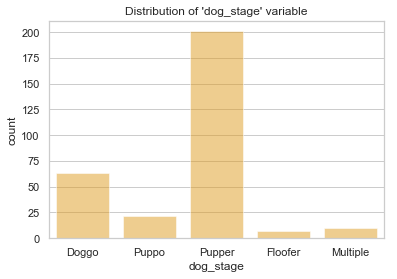

In [136]:
# Plot various dog stage percentages in the twitter data
sns.set(style="whitegrid")
dog_stages = ['Pupper', 'Doggo', 'Puppo', 'Floofer', 'Multiple']
index = np.arange(len(dog_stages))
sns.countplot(df_master[df_master['dog_stage'] != 'None']['dog_stage'], color='orange', alpha=0.5)
plt.title("Distribution of 'dog_stage' variable");

#### Insight 1

Of all the available entries with valid 'dog_stage' values, we find that 'Pupper' is the most tweeted dog stage followed by 'Doggo', 'Puppo', 'Multiple' and 'Floofer'.

In [137]:
dog_stages = ['Pupper', 'Doggo', 'Puppo', 'Floofer', 'Multiple']
print('dog_stage\t', 'retweet_count\t\t\t', 'favorite_count')
for stage in dog_stages:
    print(stage, end='\t\t')
    print("{:.2f}".format(df_master[df_master['dog_stage'] == stage]['retweet_count'].mean()), end='\t\t\t\t')
    print("{:.2f}".format(df_master[df_master['dog_stage'] == stage]['favorite_count'].mean()))

dog_stage	 retweet_count			 favorite_count
Pupper		2244.61				7000.08
Doggo		6999.94				19921.46
Puppo		6220.68				21619.05
Floofer		4639.14				12567.43
Multiple		5553.10				17151.40


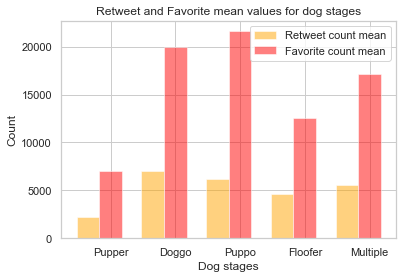

In [138]:
# Plot distribution of "Retweet and Favorite mean values for dog stages"
fig, ax = plt.subplots()
dog_stages = ['Pupper', 'Doggo', 'Puppo', 'Floofer', 'Multiple']
index = np.arange(len(dog_stages))
bar_width = 0.35
means_retweet_count, means_favorite_count = [], []

for stage in dog_stages:
    means_retweet_count.append(df_master[df_master['dog_stage'] == stage]['retweet_count'].mean())
    means_favorite_count.append(df_master[df_master['dog_stage'] == stage]['favorite_count'].mean())


plt.bar(index, means_retweet_count, bar_width,
                 alpha=0.5,
                 color='orange',
                 label='Retweet count mean')
plt.bar(index + bar_width, means_favorite_count, bar_width,
                 alpha=0.5,
                 color='red',
                 label='Favorite count mean')
plt.xlabel('Dog stages')
plt.ylabel('Count')
plt.title('Retweet and Favorite mean values for dog stages')
plt.xticks(index + bar_width, ('Pupper', 'Doggo', 'Puppo', 'Floofer', 'Multiple'))
plt.legend();

In [139]:
# Mean rating for dog stages
dog_stages = ['Pupper', 'Doggo', 'Puppo', 'Floofer', 'Multiple']
means_rating = []
print('dog_stage\t', 'mean rating')
for stage in dog_stages:
    means_rating.append("{:.2f}".format(df_master[df_master['dog_stage'] == stage]['rating'].mean()))
    print(stage, end='\t\t')
    print(df_master[df_master['dog_stage'] == stage]['rating'].mean())

dog_stage	 mean rating
Pupper		1.063815920398009
Doggo		1.1888888888888882
Puppo		1.2000000000000002
Floofer		1.2
Multiple		1.1199999999999999


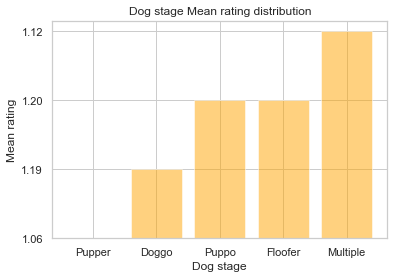

In [140]:
# Plot 'dog_stage' vs 'rating'
index = np.arange(len(dog_stages))
plt.bar(index, means_rating, color='orange', alpha=0.5)
plt.xlabel('Dog stage')
plt.ylabel('Mean rating')
plt.xticks(index, dog_stages)
plt.title('Dog stage Mean rating distribution');

#### Insight 2

Highest rated dog stages in order of decreasing mean ratings are 'Floofer', 'Puppo', 'Doggo', 'Multiple' and 'Pupper'.

#### Insight 3

Of all the available entries with valid 'dog_stage' values, we find that 'Puppo' and 'Doggo' dog stages are the most retweeted and favorited ('Puppo' stage with highest favorite count and 'Doggo' stage with highest retweet count) followed by the stages 'Multiple', 'Floofer' and 'Pupper'.

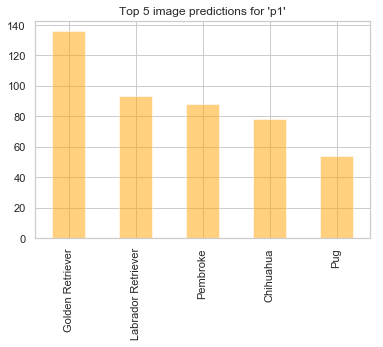

In [141]:
# plot for top 5 image predictions 'p1'
df_master[df_master.p1_dog == True]['p1'].value_counts().nlargest(5).plot(kind='bar', 
                                                                          color='orange', 
                                                                          alpha=0.5, 
                                                                         title="Top 5 image predictions for 'p1'");

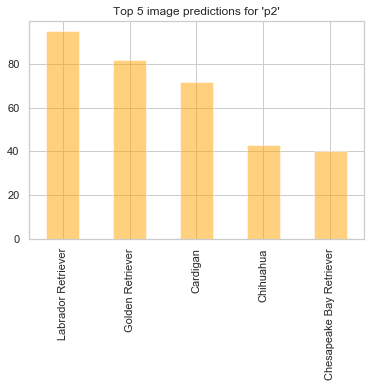

In [142]:
# plot for top 5 image predictions 'p2'
df_master[df_master.p2_dog == True]['p2'].value_counts().nlargest(5).plot(kind='bar', 
                                                                          color='orange', 
                                                                          alpha=0.5, 
                                                                         title="Top 5 image predictions for 'p2'");

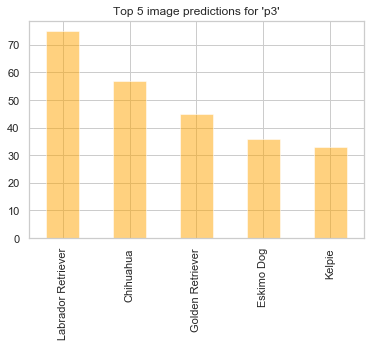

In [143]:
# plot for top 5 image predictions 'p3'
df_master[df_master.p3_dog == True]['p3'].value_counts().nlargest(5).plot(kind='bar', 
                                                                          color='orange', 
                                                                          alpha=0.5, 
                                                                         title="Top 5 image predictions for 'p3'");

#### Insight 4

The tweet image predictions derived from neural network, shows 'Golden Retriever', 'Labrador Retriever' and 'Chihuahua' as the most predicted dogs which are common in all the top 5 dog breeds among all three image predictions.

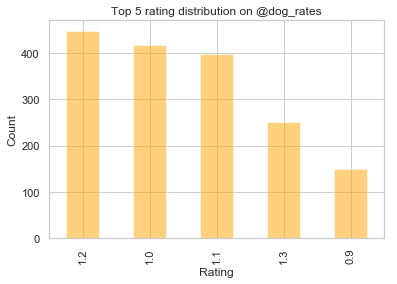

In [144]:
# plot the top 5 ratings on @dog_rates twitter account
df_master['rating'].value_counts().nlargest(5).plot(kind='bar', 
                                                    color='orange', 
                                                    alpha=0.5, 
                                                    title='Top 5 rating distribution on @dog_rates')
plt.xlabel('Rating')
plt.ylabel('Count');

#### Insight 5
Most commonly used ratings for dogs on @dog_rates twitter account are 1.2, 1.0, 1.1, 1.3 and 0.9 (in decreasing order of count).

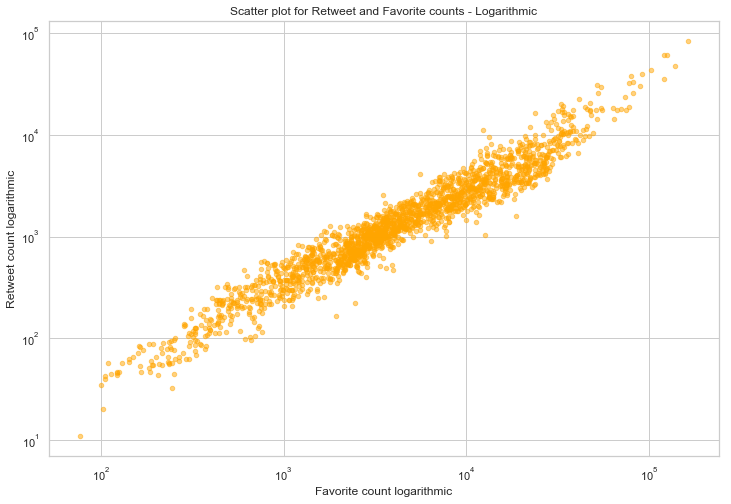

In [145]:
# plot relation between 'retweet_count' and 'favorite_count'
df_master.plot(kind='scatter', x='favorite_count', y='retweet_count', 
               logx=True, logy=True, alpha=0.5, figsize=(12, 8), color='orange')
plt.xlabel('Favorite count logarithmic')
plt.ylabel('Retweet count logarithmic')
plt.title("Scatter plot for Retweet and Favorite counts - Logarithmic");

#### Insight 6

We find that 'retweet_count' and 'favorite_count' are directly correlated with each other i.e. increase in the values of 'retweet_count' resulted in consequent increase in values of 'favorite_count'.

In [146]:
# Set 'timestamp' as index to plot 'retweet_count' and 'favorite_count' against the timeline
df_master.sort_values(by='timestamp', inplace=True)
df_master.set_index('timestamp', inplace=True)

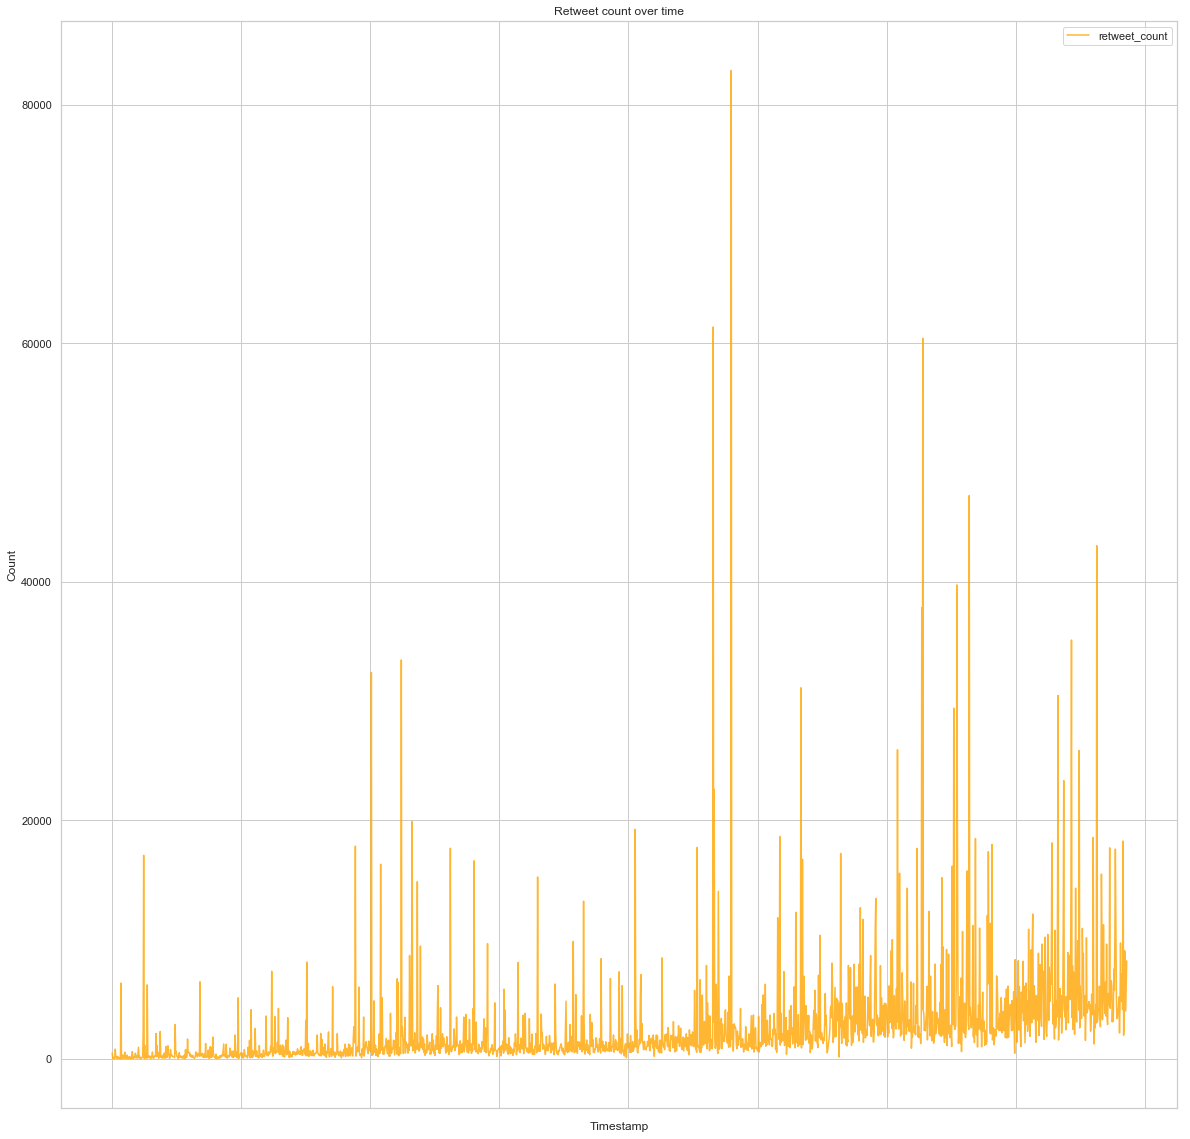

In [147]:
# Plot retweet count over time
df_master['retweet_count'].plot(color='orange', alpha=0.8, figsize=(20, 20))
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Retweet count over time')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend();

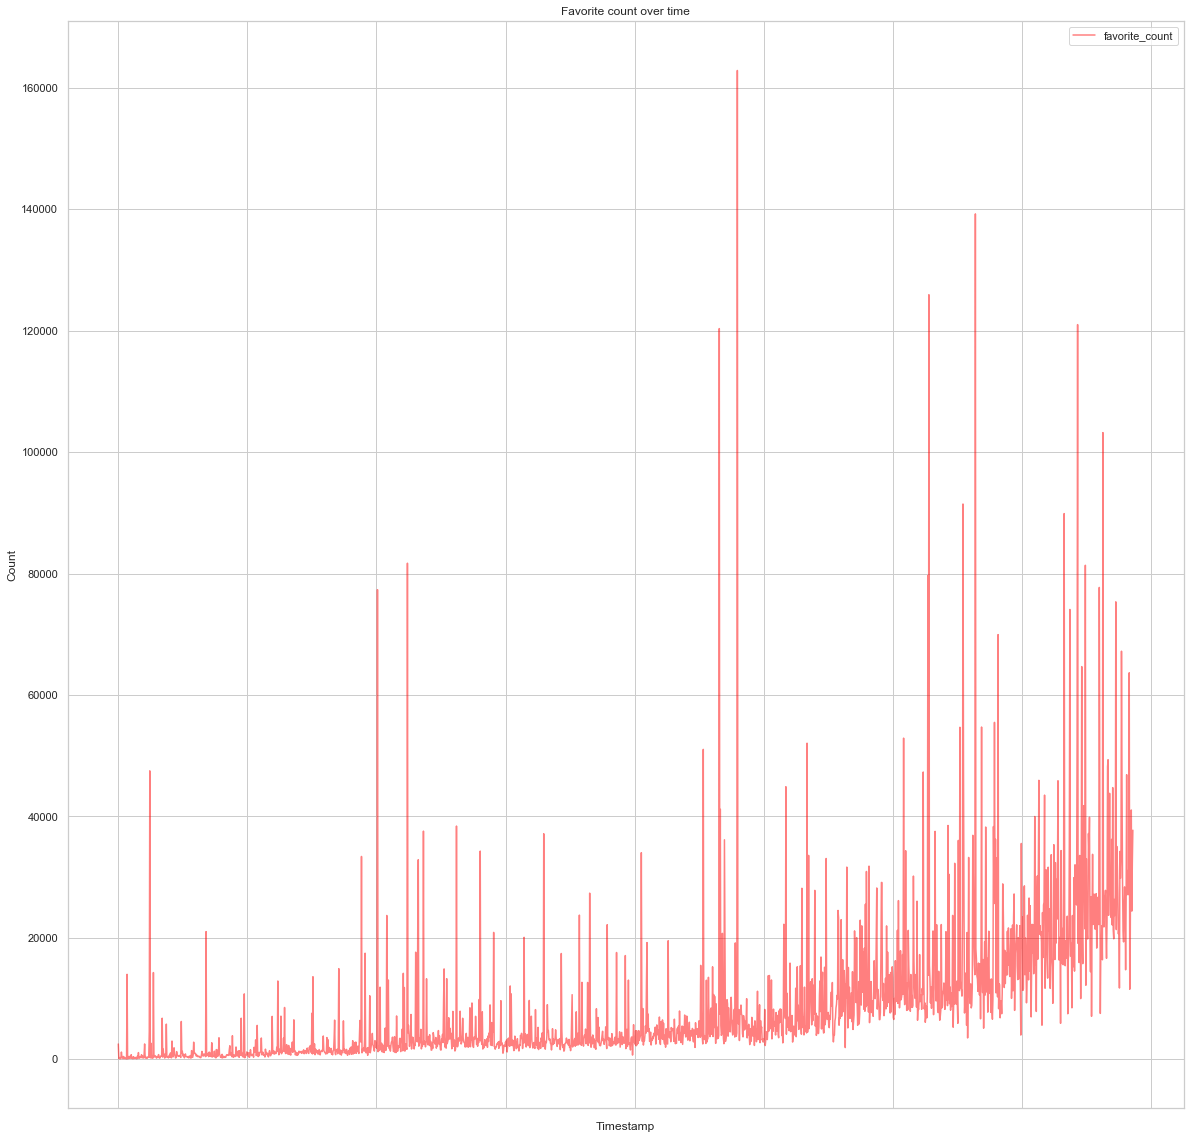

In [148]:
# Plot favorite count over time
df_master['favorite_count'].plot(color='red', alpha=0.5, figsize=(20, 20))
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Favorite count over time')
plt.legend();

#### Insight 7

There has been a steady increase in 'retweet_count' and 'favorite_count' of the tweets from the twitter account @dog_rates which indicates it growing popularity over time.